In [41]:
import warnings
warnings.filterwarnings(action='ignore')

# 1. 데이터 탐색
* 데이터 정보
▸ 타슈 운영정보 다운로드
- https://www.djsiseol.or.kr/portal/sub050201.asp
▸ 도시철도여객수송
- http://www.kric.go.kr/jsp/industry/rss/citystapassList.jsp?q_org_cd=A010010025&q_fdate=2021
▸ 대전광역시 교통 데이터 시스템
- http://tportal.daejeon.go.kr/stats/content03.view?search=1
▸ GeoPandas
- https://geopandas.org/docs.html

## 1-1. 타슈 이용현황: 2020.csv
### Load Data

In [3]:
# !pip install easygui

In [40]:
from easygui import fileopenbox
import pandas as pd
import numpy as np

In [7]:
data_file = fileopenbox()  # ./data/타슈/2020.csv 파일 선택

In [9]:
# data_file

In [13]:
## 데이터 불러오기
tashu_2020 = pd.read_csv(data_file, encoding='CP949')
tashu_2020.head(4)

,대여스테이션,대여일시,반납스테이션,반납일시,이동거리,회원구분
0,174,20200101000100,224.0,20200101001137,640.0,2
1,174,20200101000109,224.0,20200101001210,640.0,2
2,117,20200101050735,115.0,20200101051922,1070.0,0
3,167,20200101051348,94.0,20200101054627,1490.0,2


In [15]:
## 자료형 확인
tashu_2020.dtypes

대여스테이션      int64
대여일시        int64
반납스테이션    float64
반납일시        int64
이동거리      float64
회원구분        int64
dtype: object

In [16]:
## 데이터 정보 확인
tashu_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604446 entries, 0 to 604445
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여스테이션  604446 non-null  int64  
 1   대여일시    604446 non-null  int64  
 2   반납스테이션  595778 non-null  float64
 3   반납일시    604446 non-null  int64  
 4   이동거리    595857 non-null  float64
 5   회원구분    604446 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 27.7 MB


### Convert Type

In [22]:
## 실수형 -> 정수형
tashu_2020[['반납스테이션', '이동거리']] = tashu_2020[['반납스테이션', '이동거리']].fillna(-1).astype('int64').replace({-1: None})  # 결측치는 None으로 유지
tashu_2020.head(3)

,대여스테이션,대여일시,반납스테이션,반납일시,이동거리,회원구분
0,174,20200101000100,224,20200101001137,640,2
1,174,20200101000109,224,20200101001210,640,2
2,117,20200101050735,115,20200101051922,1070,0


In [23]:
tashu_2020.info()  # 결측치에 대해서 바뀌지 않아 object형으로 표시

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604446 entries, 0 to 604445
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   대여스테이션  604446 non-null  int64 
 1   대여일시    604446 non-null  int64 
 2   반납스테이션  595778 non-null  object
 3   반납일시    604446 non-null  int64 
 4   이동거리    595857 non-null  object
 5   회원구분    604446 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 27.7+ MB


In [25]:
## 데이터 열 이름
tashu_2020.columns

Index(['대여스테이션', '대여일시', '반납스테이션', '반납일시', '이동거리', '회원구분'], dtype='object')

In [27]:
## 정수형 -> 문자형
tashu_2020[['대여스테이션', '대여일시', '반납스테이션', '반납일시', '회원구분']] = tashu_2020[['대여스테이션', '대여일시', '반납스테이션', '반납일시', '회원구분']].astype('string')
tashu_2020.head()

,대여스테이션,대여일시,반납스테이션,반납일시,이동거리,회원구분
0,174,20200101000100,224,20200101001137,640,2
1,174,20200101000109,224,20200101001210,640,2
2,117,20200101050735,115,20200101051922,1070,0
3,167,20200101051348,94,20200101054627,1490,2
4,203,20200101052002,203,20200101052058,0,1


In [28]:
tashu_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604446 entries, 0 to 604445
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   대여스테이션  604446 non-null  string
 1   대여일시    604446 non-null  string
 2   반납스테이션  595778 non-null  string
 3   반납일시    604446 non-null  string
 4   이동거리    595857 non-null  object
 5   회원구분    604446 non-null  string
dtypes: object(1), string(5)
memory usage: 27.7+ MB


In [29]:
## 기술 통계량
tashu_2020.describe(include='all')  # NaN은 출력되지 않음

,대여스테이션,대여일시,반납스테이션,반납일시,이동거리,회원구분
count,604446,604446,595778,604446,595857,604446
unique,262,590970,262,590517,564,3
top,3,20200926180015,3,20200620221134,0,2
freq,25476,4,27709,4,96448,388611


## 1-2. 타슈 스테이션 현황

### Load Data

In [62]:
data_file = './data/타슈/대전광역시_공영자전거(타슈) 위치(위경도) 현황_20200801.csv'
tashu_station = pd.read_csv(data_file, encoding='CP949')
tashu_station.head(1)

,연번,Station 스테이션/성명,위치,Latitude,Longitude,광역시도코드,광역시도명,시군구코드,시군구명,법정동코드,법정동명,행정동코드,행정동명,거치대
0,1,무역전시관입구(택시승강장),대전광역시 유성구 도룡동 3-8,36.374708,127.389027,30,대전광역시,30200,유성구,3020012700,도룡동,3020055000,신성동,14


In [63]:
tashu_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   연번               262 non-null    int64  
 1   Station 스테이션/성명  262 non-null    object 
 2   위치               262 non-null    object 
 3   Latitude         262 non-null    float64
 4   Longitude        262 non-null    float64
 5   광역시도코드           262 non-null    int64  
 6   광역시도명            262 non-null    object 
 7   시군구코드            262 non-null    int64  
 8   시군구명             262 non-null    object 
 9   법정동코드            262 non-null    int64  
 10  법정동명             262 non-null    object 
 11  행정동코드            262 non-null    int64  
 12  행정동명             262 non-null    object 
 13  거치대              262 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 28.8+ KB


### Convert Type

In [66]:
## 정수형 -> 문자형
tashu_station['연번'] = tashu_station['연번'].astype('string')
tashu_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   연번               262 non-null    string 
 1   Station 스테이션/성명  262 non-null    object 
 2   위치               262 non-null    object 
 3   Latitude         262 non-null    float64
 4   Longitude        262 non-null    float64
 5   광역시도코드           262 non-null    int64  
 6   광역시도명            262 non-null    object 
 7   시군구코드            262 non-null    int64  
 8   시군구명             262 non-null    object 
 9   법정동코드            262 non-null    int64  
 10  법정동명             262 non-null    object 
 11  행정동코드            262 non-null    int64  
 12  행정동명             262 non-null    object 
 13  거치대              262 non-null    int64  
dtypes: float64(2), int64(5), object(6), string(1)
memory usage: 28.8+ KB


In [67]:
## 기술 통계량
tashu_station.describe(exclude=[np.number])  # 수치형 제외

,연번,Station 스테이션/성명,위치,광역시도명,시군구명,법정동명,행정동명
count,262,262,262,262,262,262,262
unique,262,262,258,1,5,87,70
top,121,삼정삼거리,대전광역시 유성구 구성동 23,대전광역시,유성구,둔산동,온천2동
freq,1,1,4,262,76,20,14


## 1-3. 자료 합치기
* 타슈 이용 현황: 2020.csv
* 타슈 스테이션 현황: 대전광역시_공영자전거(타슈) 위치(위경도) 현황_20200801.csv

    => 대여/반납스테이션 이름 추가

In [97]:
df_right = tashu_station[['연번', 'Station 스테이션/성명']]
df_right.columns = ['대여스테이션', '대여스테이션_이름']
tashu_2020_station = tashu_2020.merge(df_right, left_on='대여스테이션', right_on='대여스테이션')

In [98]:
df_right = tashu_station[['연번', 'Station 스테이션/성명']]
df_right.columns = ['반납스테이션', '반납스테이션_이름']
tashu_2020_station = tashu_2020_station.merge(df_right, left_on='반납스테이션', right_on='반납스테이션', how='left')

In [99]:
tashu_2020_station.head(3)

,대여스테이션,대여일시,반납스테이션,반납일시,이동거리,회원구분,대여스테이션_이름,반납스테이션_이름
0,174,20200101000100,224,20200101001137,640,2,가수원네거리(전통시장 입구),정림삼거리
1,174,20200101000109,224,20200101001210,640,2,가수원네거리(전통시장 입구),정림삼거리
2,174,20200101233236,175,20200101234225,800,2,가수원네거리(전통시장 입구),건양대네거리


In [100]:
tashu_2020_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604446 entries, 0 to 604445
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   대여스테이션     604446 non-null  string
 1   대여일시       604446 non-null  string
 2   반납스테이션     595778 non-null  string
 3   반납일시       604446 non-null  string
 4   이동거리       595857 non-null  object
 5   회원구분       604446 non-null  string
 6   대여스테이션_이름  604446 non-null  object
 7   반납스테이션_이름  595778 non-null  object
dtypes: object(3), string(5)
memory usage: 41.5+ MB


In [101]:
tashu_2020_station = tashu_2020_station.sort_values(by=['대여일시', '반납일시'])
tashu_2020_station

,대여스테이션,대여일시,반납스테이션,반납일시,이동거리,회원구분,대여스테이션_이름,반납스테이션_이름
0,174,20200101000100,224,20200101001137,640,2,가수원네거리(전통시장 입구),정림삼거리
1,174,20200101000109,224,20200101001210,640,2,가수원네거리(전통시장 입구),정림삼거리
3455,117,20200101050735,115,20200101051922,1070,0,동부네거리,한전 대전세종충남지역본부(건너편)
5304,167,20200101051348,94,20200101054627,1490,2,원동네거리,미리내아파트
6962,203,20200101052002,203,20200101052058,0,1,죽동 금성백조,죽동 금성백조
...,...,...,...,...,...,...,...,...
473879,87,20201231233850,118,20210101002139,0,2,쌍용예가아파트,복합터미널
406942,182,20201231233856,182,20201231233937,0,2,한밭대 입구,한밭대 입구
484709,42,20201231234559,83,20210101001215,2470,0,갈마네거리,유평초등학교
463885,115,20201231235132,196,20210101001502,1730,0,한전 대전세종충남지역본부(건너편),대덕문화원


### Create Variables
* 회원구분(0 : 정회원, 1 : 일반회원, 2 : 비회원)

In [102]:
## 회원구분 값
idx = tashu_2020_station['회원구분'].astype('int')
idx

0         2
1         2
3455      0
5304      2
6962      1
         ..
473879    2
406942    2
484709    0
463885    0
142794    2
Name: 회원구분, Length: 604446, dtype: int32

In [107]:
## 회원구분 수준
col_levels = {0:'정회원', 1:'일반회원', 2:'비회원'}
print(col_levels[0], col_levels[1], col_levels[2])

정회원 일반회원 비회원


In [108]:
## 변수 생성
tashu_2020_station['회원구분2'] = [col_levels[i] for i in idx]
tashu_2020_station.head(3)

,대여스테이션,대여일시,반납스테이션,반납일시,이동거리,회원구분,대여스테이션_이름,반납스테이션_이름,회원구분2
0,174,20200101000100,224,20200101001137,640,2,가수원네거리(전통시장 입구),정림삼거리,비회원
1,174,20200101000109,224,20200101001210,640,2,가수원네거리(전통시장 입구),정림삼거리,비회원
3455,117,20200101050735,115,20200101051922,1070,0,동부네거리,한전 대전세종충남지역본부(건너편),정회원


In [112]:
## 변수 생성이 잘 되었는지 확인
print(tashu_2020_station['회원구분'].value_counts())
print(tashu_2020_station['회원구분2'].value_counts())

2    388611
0    119541
1     96294
Name: 회원구분, dtype: Int64
비회원     388611
정회원     119541
일반회원     96294
Name: 회원구분2, dtype: int64


In [113]:
## 기술통계량
tashu_2020_station.describe(include='all')

,대여스테이션,대여일시,반납스테이션,반납일시,이동거리,회원구분,대여스테이션_이름,반납스테이션_이름,회원구분2
count,604446,604446,595778,604446,595857,604446,604446,595778,604446
unique,262,590970,262,590517,564,3,262,262,3
top,3,20200926180015,3,20200620221134,0,2,한밭수목원1,한밭수목원1,비회원
freq,25476,4,27709,4,96448,388611,25476,27709,388611


# 2. 시각화
## 2-1. 패키지 소개
* matplotlib
* seaborn
* plotnine

In [30]:
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'Gulim'  # 그래프에 한글 표시를 위한 글꼴 설정
plt.style.use('ggplot')  # 그래프 스타일

In [43]:
import seaborn as sns

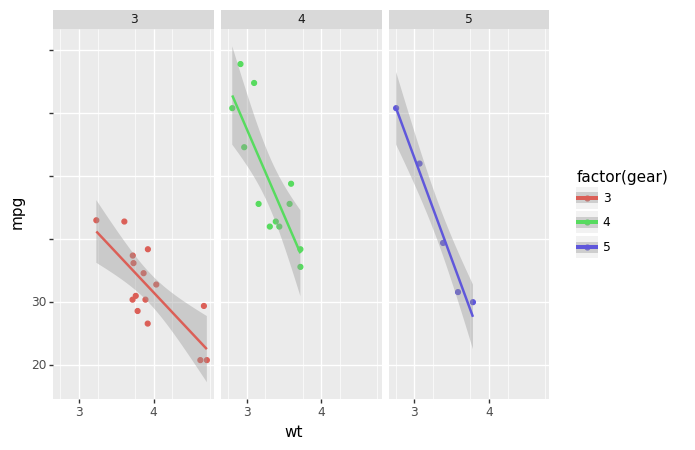

<ggplot: (128071973404)>

In [42]:
# pip install plotnine --user

from plotnine import *
from plotnine.data import mtcars
(
    ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
    + geom_point()
    + stat_smooth(method='lm')
    + facet_wrap('~gear')
)

## 2-2. 단일 변수 탐색

In [44]:
data_file = './data/타슈/대전광역시_공영자전거(타슈) 위치(위경도) 현황_20200801.csv'
tashu_station = pd.read_csv(data_file, encoding='CP949')

In [45]:
## 빈도표
tb = pd.crosstab(tashu_station['시군구명'], 'Freq', colnames=[''])
tb

,Freq
시군구명,
대덕구,38
동구,36
서구,73
유성구,76
중구,39


In [46]:
## 빈도표 - 내림차순 정렬
tb_sort = tb.sort_values('Freq', ascending=False)
tb_sort

,Freq
시군구명,
유성구,76
서구,73
중구,39
대덕구,38
동구,36


### 막대 그래프

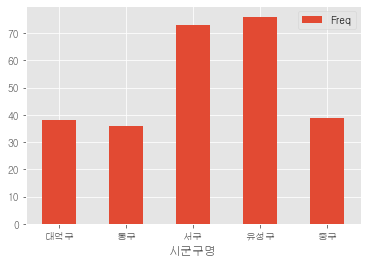

In [47]:
ax = tb.plot.bar(rot=0)

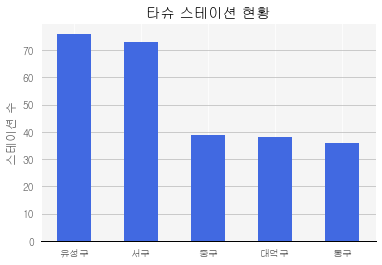

In [52]:
## 막대 그래프 - 수직
ax = tb_sort.plot.bar(rot=0, color="royalblue")  # 색상
ax.set_title("타슈 스테이션 현황")               # 제목
ax.set_xlabel("")                                # x축 이름
ax.set_ylabel("스테이션 수")                     # y축 이름
ax.legend().remove()                             # 범례 제거
ax.set_facecolor('whitesmoke')                        # 배경색
ax.grid(True, axis='y', color="silver")         # 눈금선(y축)
ax.tick_params(left = False, bottom = False)   # 눈금 제거
ax.spines['bottom'].set_color('black')           # x축 표시
plt.show()

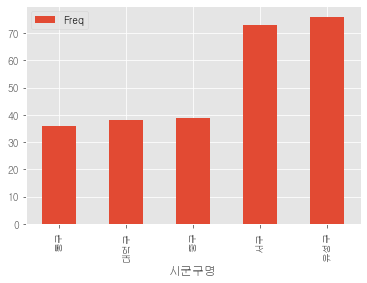

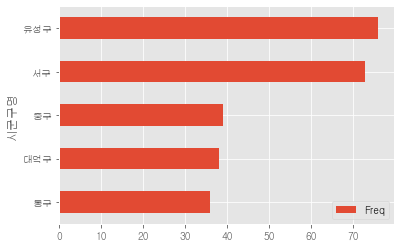

In [57]:
## 막대그래프 - 수직, 수평
tb_sort_asc = tb.sort_values('Freq', ascending=True)
ax = tb_sort_asc.plot.bar()  # 수직
ax = tb_sort_asc.plot.barh()  # 수평

### 원 그래프

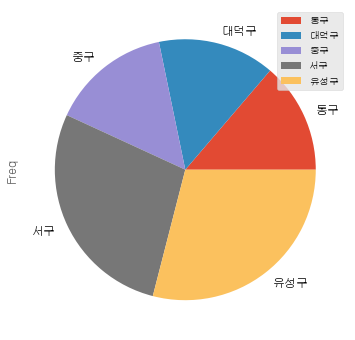

In [58]:
ax = tb_sort_asc.plot.pie(y='Freq', figsize=(6, 6), fontsize=12)

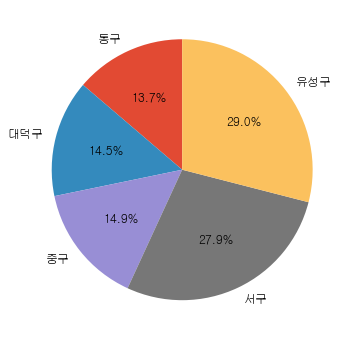

In [61]:
ax = tb_sort_asc.plot.pie(y='Freq', figsize=(6, 6), fontsize=12,
                         startangle=90, autopct='%.1f%%')
ax.legend().remove()
ax.set_ylabel("")
plt.show()